<a href="https://colab.research.google.com/github/abhishekar18/Cryptocurrency-Prediction-using-LSTM/blob/main/CryptoPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
cryp = input("Enter the cryptocurrency code ")
curr = input("Enter the currency code ")
cur1=curr.upper()
curr = "?fsym="+cryp+"&tsym="+curr+"&limit=500"
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + curr)
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

Enter the cryptocurrency code BTC
Enter the currency code INR


In [ ]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [ ]:
hist.head(50)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-07-02,3709886.85,2230400.00,2769989.32,3.456,9065714.44,2800022.40
2021-07-03,4248969.87,2260152.61,2800022.40,4.068,10599065.70,2761103.78
2021-07-04,5540012.74,2315234.04,2761103.78,3.321,8947812.01,2755230.81
2021-07-05,3977091.95,2248605.86,2755230.81,4.720,12541176.09,2531030.43
2021-07-06,3337324.22,2323314.81,2531030.43,3.763,10081309.57,2697919.36
2021-07-07,3643889.93,2341365.47,2697919.36,4.736,12539907.47,2594495.69
2021-07-08,4030004.70,2182238.76,2594495.69,4.069,10492468.25,2490101.28
2021-07-09,6391001.47,2209586.66,2490101.28,3.594,9401014.20,2743986.10
2021-07-10,5540012.74,2259754.23,2743986.10,2.595,6854073.74,2719002.02


In [ ]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [ ]:
train, test = train_test_split(hist, test_size=0.2)

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price ['+cur1+']', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

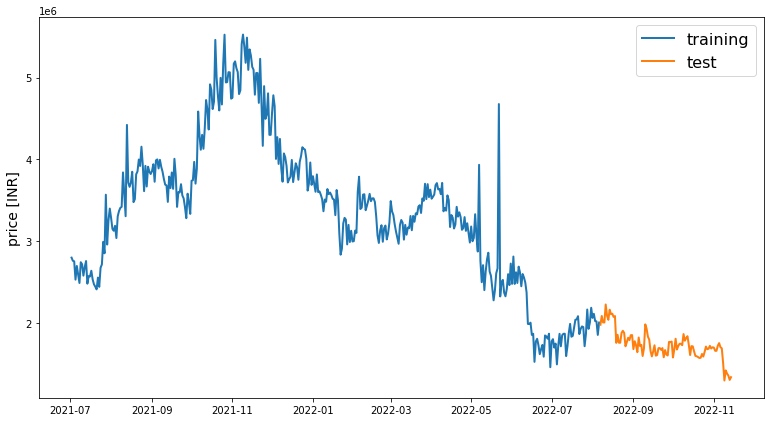

In [ ]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')


In [ ]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [ ]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [ ]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [ ]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [ ]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [ ]:
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [ ]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
13/13 [==============================] - 3s 50ms/step - loss: 0.0124 - val_loss: 0.0404
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0098 - val_loss: 0.0631
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.0694
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.0374
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.0797
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0084 - val_loss: 0.0556
Epoch 7/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0074 - val_loss: 0.0594
Epoch 8/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0077 - val_loss: 0.0302
Epoch 9/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0072 - val_loss: 0.0249
Epoch 10/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0072 - val_loss: 0.0348
Epoch 11/20
13/13 

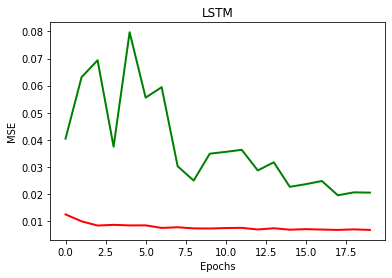

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [ ]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

3/3 [==============================] - 0s 5ms/step


0.0691351027886772

In [ ]:
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(preds, y_test)
MAE

0.020460234865871087

In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test, preds)
R2

-2.1894802654268135

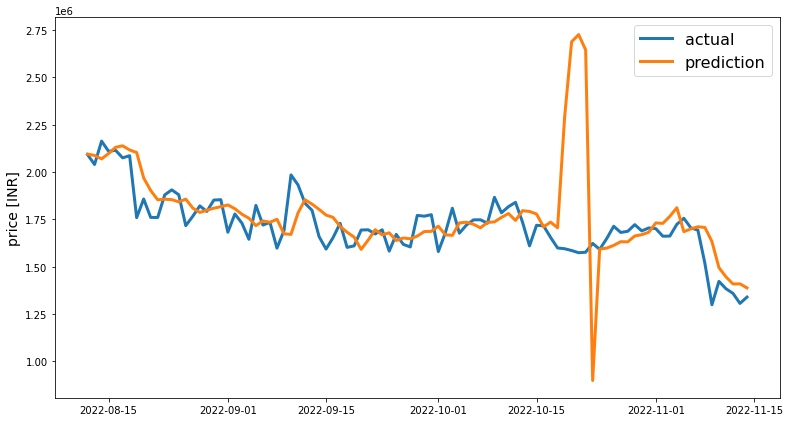

In [ ]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)